<a href="https://colab.research.google.com/github/khanhlam16/Bai-tap-nhan-dien/blob/main/nhan_dien_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Le Khanh Lam/hoa/train', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 174 images belonging to 3 classes.


In [ ]:
val_set = val_datagen.flow_from_directory('/content/drive/My Drive/Le Khanh Lam/hoa/validation', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 18 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'Cam tu cau': 0, 'Hoa cuc': 1, 'Hoa lan': 2}

In [ ]:
val_set.class_indices

{'Cam tu cau': 0, 'Hoa cuc': 1, 'Hoa lan': 2}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', padding='same',input_shape=(224,224,3))) 
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=val_set)

Epoch 1/100
6/6 [==============================] - 3s 419ms/step - loss: 1.2426 - accuracy: 0.2931 - val_loss: 1.0863 - val_accuracy: 0.3333
Epoch 2/100
6/6 [==============================] - 2s 379ms/step - loss: 1.0814 - accuracy: 0.4483 - val_loss: 0.9819 - val_accuracy: 0.3889
Epoch 3/100
6/6 [==============================] - 2s 382ms/step - loss: 0.9188 - accuracy: 0.5690 - val_loss: 0.6214 - val_accuracy: 0.6667
Epoch 4/100
6/6 [==============================] - 2s 377ms/step - loss: 0.7379 - accuracy: 0.6609 - val_loss: 0.5205 - val_accuracy: 0.6667
Epoch 5/100
6/6 [==============================] - 3s 489ms/step - loss: 0.6844 - accuracy: 0.6437 - val_loss: 0.7372 - val_accuracy: 0.6667
Epoch 6/100
6/6 [==============================] - 3s 438ms/step - loss: 0.6556 - accuracy: 0.7069 - val_loss: 0.5118 - val_accuracy: 0.6667
Epoch 7/100
6/6 [==============================] - 2s 380ms/step - loss: 0.5685 - accuracy: 0.7011 - val_loss: 0.4143 - val_accuracy: 0.7222
Epoch 8/100
6

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0012754063354805112
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

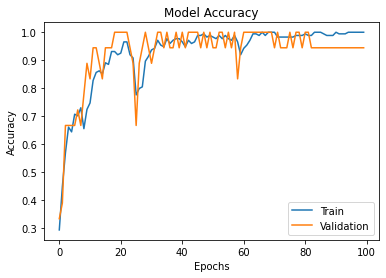

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("hoa.h5")

In [ ]:
model_flower=load_model('hoa.h5')

1/1 [==============================] - 0s 17ms/step
Hoa cẩm tú cầu


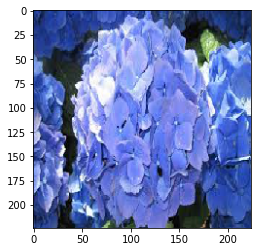

1/1 [==============================] - 0s 22ms/step
Hoa lan


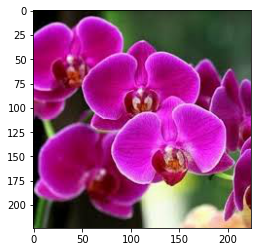

1/1 [==============================] - 0s 17ms/step
Hoa cúc


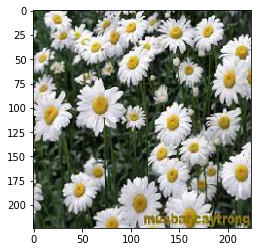

In [ ]:
import os
test = '/content/drive/My Drive/Le Khanh Lam/hoa/test/test1'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(224,224))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_flower.predict(img)
  if round(result[0][0])==1:
    prediction='Hoa cẩm tú cầu'
  if round(result[0][1])==1:
    prediction = 'Hoa cúc'
  if round(result[0][2])==1:
    prediction='Hoa lan'
  print(prediction)
  plt.show()

In [ ]:
!jupyter nbconvert --to html "/content/nhan_dien_hoa (1).ipynb.ipynb"


[NbConvertApp] WARNING | pattern '/content/nhan_dien_hoa (1).ipynb.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_ye